## Fine Tuning with OpenAI
- Moving to Fine Tuning with OpenAI personal account.
- Because of time limitatiton, few examples  were labelled and used for fine-tuning.
- Fine-tuning Guidelines
    - Use a separator at prompt end
    - use a end token for completion end or }
    - aim for ~500 example
    - Prompt + completion < 2048 token>
    - Lower learning rate     
    - 1-2 epochs recommended (Observed to work better for extraction tasks)



#  0. BackGround
Improvement Option 2: Fine Tuning 
- Why ?
    - Better results compared to simple prompt design/ tuning only.
    - Can train on more examples
    - Lower latency 
    - No need to provide examples in prompt.
    - No need for detailed instruction on how to extract data. Only single input prompt & its desired completion output required.
- FineTuning :
    - Create Train & validation data.
    - Recommended : At least 200 examples. Rough guideline, Double Dataset ~ linear increase in model performance.
    
- Implement Improvement
- Compare & Discuss Difference
- Improvements ToDo :
    - Fine Tune Model
        - Get more examples. Since we can only provide limited examples in the prompt. We can provide those examples in the training data and fine tune the model.
        - Labelled Data in the following format from the patent data
        - JSON UTF-8 Encoded Training File < 200MB & including a BOM  (byte order marking)
        - Prompt should end with fixed separator i.e \n\n###\n\n
        - Each completion should start with a whitespace
        - Each completion should end with a fixed stop sequence i.e  \n or ### or END
        - Sort extracted entities, in the order that they appear in prompt.
        - Training Data Format
        ```
        {
            "prompt":"<any text, for example news article>\n\n###\n\n", 
            "completion":" <list of entities, separated by a newline> END"
        }
        {"prompt": "<prompt text>", "completion": "<ideal generated text>"}
        {"prompt": "<prompt text>", "completion": "<ideal generated text>"}

# 1. FineTuning

### 1.1 Fine Tuning with Azure : Blocked
- Most likely permission error.   Encountered Error while trying to upload the training file to  azure.
- Moving to Fine Tuning with OpenAI personal account.

In [1]:
import openai
from openai import cli
import time
import shutil
import json

from openai_keys import *

openai.api_key = OPENAI_KEY_EXTERNAL
openai.api_base = OPENAI_API_BASE_EXTERNAL

training_file_name = "bikal_fine_tuning_training_data.jsonl"
validation_file_name = "bikal_fine_tuning_validation_data.jsonl"
sample_data = [
    {
        "prompt": "The BaCO<sub>3 <\/sub>and CeO<sub>2 <\/sub>crystallites formed particles with a size of between about 5 and 50 microns.\nOUTPUT: ",
        "completion": " BaCO<sub>3'}, {'chemical compound': 'CeO<sub>3'}], 'dimension': 'crystallite size', 'measurement unit': 'nm', 'measured value low': '20', 'measured value high': '40'}]}",
    },
    {
        "prompt": "According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. \n Other suitable alkaline earth oxides include oxides of Mg, Sr, and Ca. In certain embodiments, the composite particles have a BET surface area of between about 30 and 80 m\nOUTPUT: ",
        "completion": " ceria'}], 'dimension': 'crystallite size', 'measurement unit': 'nm', 'measured value low': '10', 'measured value high': '20'}, {'chemical compound list': [{'chemical compound': 'alkaline earth oxides'}], 'dimension': 'crystallite size', 'measurement unit': 'nm', 'measured value low': '20', 'measured value high': '40'}, {'chemical compound list': [{'chemical compound': 'composite particles'}], 'dimension': 'BET surface area', 'measurement unit': 'm', 'measured value low': '30', 'measured value high': '80'}]}",
    },
]

# Generate the training dataset file.
print(f"Generating the training file: {training_file_name}")
with open(training_file_name, "w") as training_file:
    for entry in sample_data:
        json.dump(entry, training_file)
        training_file.write("\n")

# Copy the validation dataset file from the training dataset file.
# Typically, your training data and validation data should be mutually exclusive.
# For the purposes of this example, we're using the same data.
print(f"Copying the training file to the validation file")
shutil.copy(training_file_name, validation_file_name)


def check_status(training_id, validation_id):
    train_status = openai.File.retrieve(training_id)["status"]
    valid_status = openai.File.retrieve(validation_id)["status"]
    print(f"Status (training_file | validation_file): {train_status} | {valid_status}")
    return (train_status, valid_status)


print("Checking for existing uploaded files.")
results = []
files = openai.File.list().data
print(f"Found {len(files)} total uploaded files in the subscription.")
for item in files:
    if item["filename"] in [training_file_name, validation_file_name]:
        results.append(item["id"])
print(f"Found {len(results)} already uploaded files that match our names.")

# # Upload the training and validation dataset files to Azure OpenAI.
# training_id = cli.FineTune._get_or_upload(training_file_name, True)
# validation_id = cli.FineTune._get_or_upload(validation_file_name, True)

# Check on the upload status of the training and validation dataset files.
# (train_status, valid_status) = check_status(training_id, validation_id)

# # Poll and display the upload status once a second until both files have either
# # succeeded or failed to upload.
# while train_status not in ["succeeded", "failed"] or valid_status not in ["succeeded", "failed"]:
#     time.sleep(1)
#     (train_status, valid_status) = check_status(training_id, validation_id)


Generating the training file: bikal_fine_tuning_training_data.jsonl
Copying the training file to the validation file
Checking for existing uploaded files.


InvalidRequestError: Resource not found

### 1.2 Fine Tuning with OpenAI : Chosen
- Moving to Fine Tuning with OpenAI personal account.
- Because of time limitatiton, few examples  were labelled and used for fine-tuning.
- Fine-tuning Guidelines
    - Use a separator at prompt end
    - use a end token for completion end or }
    - aim for ~500 example
    - Prompt + completion < 2048 token>
    - Lower learning rate     
    - 1-2 epochs recommended (Observed to work better for extraction tasks)



#### 1.2.1 Sample  FineTune Training Data:
- Preview of Sample Data from the fine tuning traing data file



In [ ]:
```
{"prompt": "The BaCO<sub>3 </sub>and CeO<sub>2 </sub>crystallites formed particles with a size of between about 5 and 50 microns.\nSTRICT AND VALID JSON OUTPUT ONLY: ", "completion" : {"measurement and values" :[{"chemical compound list": [ {"chemical compound": "BaCO<sub>3"}, {"chemical compound": "CeO<sub>2"}], "dimension": "crystallite size", "measured value low" : "5", "measured value high": "50","measurement unit" : "microns" } ] } }
{"prompt": "Sodium Hydroxide  and HCL were used and their corresponding concentration and and weight respectively  were 2 %  and 0.9 percent respectively\nSTRICT AND VALID JSON OUTPUT ONLY: ", "completion": {"measurement and values": [{"chemical compound list": [{"chemical compound": "Sodium Hydroxide"}], "dimension": "concentration",  "measured value low": "2", "measured value high": "2", "measurement unit": "%"}, {"chemical compound list": [{"chemical compound": "HCL"}], "dimension": "weight", "measured value low": "0.9", "measured value high": "0.9", "measurement unit": "percent"}]}}
```


In [2]:
import os
import openai
from openai_keys import *

openai_key = OPENAI_KEY_BIKAL
openai_org = OPENAI_ORG_BIKAL

# openai.organization = os.getenv("OPENAI_ORG")
# openai.api_key = os.getenv("OPENAI_API_KEY")


### 1.2.2 Fine Tuning : Data Preparation

In [9]:
!openai tools fine_tunes.prepare_data -f Data/training/fine_tune_train.json
!openai tools fine_tunes.prepare_data -f Data/training/validate.json

In [15]:
!openai api fine_tunes.create -t "Data/training/fine_tune_train_prepared_v2.jsonl" \
  -v "Data/training/validation_prepared_v2.jsonl"  \
  --model ada \
  --suffix "bikal-entity-extraction" \
  --n_epochs 2  

Upload progress: 100%|████████████████████| 13.3k/13.3k [00:00<00:00, 7.67Mit/s]
Uploaded file from Data/training/fine_tune_train_prepared_v2.jsonl: file-POKNuOwgHWfH7fPQ7gqvgVPg
Upload progress: 100%|████████████████████| 3.39k/3.39k [00:00<00:00, 2.07Mit/s]
Uploaded file from Data/training/validation_prepared_v2.jsonl: file-HbxfkOBvPxMpzmJniSiz6kui
Created fine-tune: ft-zClyOwFjcMYRC0ZaG8zZsvVD
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-10 08:39:45] Created fine-tune: ft-zClyOwFjcMYRC0ZaG8zZsvVD

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-zClyOwFjcMYRC0ZaG8zZsvVD



In [21]:
!openai api fine_tunes.follow -i ft-zClyOwFjcMYRC0ZaG8zZsvVD


[2023-05-10 08:39:45] Created fine-tune: ft-zClyOwFjcMYRC0ZaG8zZsvVD
[2023-05-10 08:41:13] Fine-tune costs $0.00
[2023-05-10 08:41:13] Fine-tune enqueued. Queue number: 18
[2023-05-10 08:45:57] Fine-tune is in the queue. Queue number: 17
[2023-05-10 08:51:35] Fine-tune is in the queue. Queue number: 16

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-zClyOwFjcMYRC0ZaG8zZsvVD



### 1.2.3 Model Fine Tuning :  Ada / DaVinci


In [ ]:
!openai api fine_tunes.create -t "Data/training/fine_tune_train_prepared_v2.jsonl" \
  -v "Data/training/validation_prepared_v2.jsonl"  \
  --model ada \
  --suffix "bikal-entity-extraction" \
  --n_epochs 2  

In [48]:
!openai api fine_tunes.create -t "Data/training/fine_tune_train_prepared_v3.jsonl" \
  -v "Data/training/validation_prepared_v3.jsonl"  \
  --model davinci \
  --suffix "bikal-davinci-entity-extraction" \
  --n_epochs 2  

Upload progress: 100%|████████████████████| 13.3k/13.3k [00:00<00:00, 7.84Mit/s]
Uploaded file from Data/training/fine_tune_train_prepared_v3.jsonl: file-pStx1ucNeWsGQDsB9ayPYI1A
Upload progress: 100%|████████████████████| 3.39k/3.39k [00:00<00:00, 8.12Mit/s]
Uploaded file from Data/training/validation_prepared_v3.jsonl: file-FEMJTM90KrjKNSLFI39FSn6a
Created fine-tune: ft-aKBC8OOqRCD3Rwx7y42EVQQj
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-05-10 09:51:14] Created fine-tune: ft-aKBC8OOqRCD3Rwx7y42EVQQj

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-aKBC8OOqRCD3Rwx7y42EVQQj



In [ ]:
!openai api fine_tunes.follow -i ft-aKBC8OOqRCD3Rwx7y42EVQQj

### 1.2.4 Finetuning Result / Evaluation


In [91]:
import pandas as pd

!openai api fine_tunes.results -i ft-aKBC8OOqRCD3Rwx7y42EVQQj > finetuning_result.csv

results = pd.read_csv('finetuning_result.csv')
results.head(10)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy
0,1,169,1,0.738342,0.0,0.804878,0.879549,0.0,0.750000
1,2,442,2,0.513950,0.0,0.862944,NaN,NaN,NaN
2,3,747,3,0.441248,0.0,0.883333,NaN,NaN,NaN
3,4,972,4,0.476913,0.0,0.854962,NaN,NaN,NaN
4,5,1109,5,0.748070,0.0,0.776471,NaN,NaN,NaN
5,6,1222,6,0.750216,0.0,0.818182,NaN,NaN,NaN
6,7,1327,7,0.667762,0.0,0.772727,NaN,NaN,NaN
7,8,1592,8,0.225810,0.0,0.891473,NaN,NaN,NaN
8,9,1849,9,0.189972,0.0,0.930108,0.105853,0.0,0.959596
9,10,2074,10,0.211084,0.0,0.927007,NaN,NaN,NaN


#### 1.2.4.1 Plot Finetuning Results:


<AxesSubplot: title={'center': 'Training & Validation Extraction Accuracy'}>

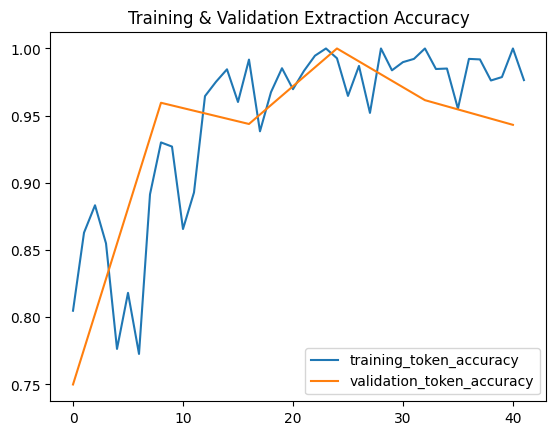

In [92]:
results[results["training_token_accuracy"].notnull()]["training_token_accuracy"].plot(legend=True)
results[results["validation_token_accuracy"].notnull()]["validation_token_accuracy"].plot(
    title="Training & Validation Extraction Accuracy", legend=True
)


In [93]:
!curl https://api.openai.com/v1/fine-tunes -H "Authorization: Bearer $OPENAI_API_KEY"

{
  "object": "list",
  "data": [
    {
      "object": "fine-tune",
      "id": "ft-466QYXBYWzKzAwmx8EuQSZQD",
      "hyperparams": {
        "n_epochs": 2,
        "batch_size": 1,
        "prompt_loss_weight": 0.01,
        "learning_rate_multiplier": 0.1
      },
      "organization_id": "org-2BcYjNyhV4QKqZ2iqsGeSnBq",
      "model": "ada",
      "training_files": [
        {
          "object": "file",
          "id": "file-HWcdjzmyXvof1Ba1q4SK0GwN",
          "purpose": "fine-tune",
          "filename": "fine_tune_train_prepared.jsonl",
          "bytes": 12783,
          "created_at": 1683694864,
          "status": "processed",
          "status_details": null
        }
      ],
      "validation_files": [
        {
          "object": "file",
          "id": "file-bR7EO4eVuemVfEh6fFJb0jBl",
          "purpose": "fine-tune",
          "filename": "validation_prepared.jsonl",
          "bytes": 3258,
          "created_at": 1683694865,
          "status": "processed",
         

## 2. Data Extraction using Fine-tuned Model

### 2.1 Sample Run
- 

In [24]:
finetuned_model = "ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58"

text = "The BaCO<sub>3 </sub>and CeO<sub>2 </sub>crystallites formed particles with a size of between about 5 and 50 microns."
output_prompt = " \nOutput "
res = openai.Completion.create(model=finetuned_model, prompt=text + output_prompt, max_tokens=1000, temperature=0)
res["choices"][0]["text"]


" {'measurement and values': [{'chemical compound list': [{'chemical compound': 'BaCO<sub>3'}], 'dimension': 'dimension', 'measured value low': '5', 'measured value high': '50', 'measurement unit': 'microns'}, {'chemical compound list': [{'chemical compound': 'CeO<sub>2'}], 'dimension': 'dimension', 'measured value low': '5', 'measured value high': '50', 'measurement unit': 'microns'}]}]}\n\n{'chemical compound list': [{'chemical compound': 'BaCO<sub>3'}], 'dimension': 'dimension', 'measured value low': '5', 'measured value high': '50', 'measurement unit': 'microns'}]}\n\n{'chemical compound list': [{'chemical compound': 'CeO<sub>2'}], 'dimension': 'dimension', 'measured value low': '5', 'measured value high': '50', 'measurement unit': 'microns'}]}\n\n{'chemical compound list': [{'chemical compound': 'BaCO<sub>3'}], 'dimension': 'dimension', 'measured value low': '5', 'measured value high': '50', 'measurement unit': 'microns'}]}\n\n{'chemical compound list': [{'chemical compound': 'CeO

### 2.2 Doc Span estimation

In [80]:
import tiktoken
from bs4 import BeautifulSoup

# tokenizer = tiktoken.get_encoding("cl100k_base")
tokenizer = tiktoken.get_encoding("p50k_base")


def get_token_count(text):
    return len(tokenizer.encode(text))


def get_text_and_sub_xml_from_xml(filepath, tag):
    with open(filepath, "r") as f:
        patent_file = f.read()

    soup = BeautifulSoup(patent_file, "xml")
    text_including_xml = soup.findAll(tag)
    return text_including_xml


def check_token_exceeds(chemical_patent_file, max_token_allowed, completion_reserved_token_count=1000, doc_span=4000):
    patent_text = str(get_text_and_sub_xml_from_xml(chemical_patent_file, "description")[0])
    doc_len = len(patent_text)
    for doc_end in range(0, doc_len, doc_span):
        cur_doc_chunk = patent_text[doc_end : doc_end + doc_span]
        cur_token_count = get_token_count(cur_doc_chunk)
        print(cur_token_count)
        if cur_token_count > max_token_allowed - completion_reserved_token_count:
            print(
                f" Token limit will be exceeded for Doc chunk {doc_end} - {doc_end+doc_span} . Cur token count {cur_token_count}"
            )


check_token_exceeds(chemical_patent_file, 2049, 500, 4000)


876
920
822
823
1068
1232
1203
1231
1087
963
980
965
1004
1069
123


## 2.3 Extract Data from File :

### 2.3.1 Held-out Validation File
- Patent Randomly Chosen for Discussion  : Data/basf_ipg110920/basf_only/patent_3476.xml
- Chosen in the prior prompt based tuning notebook.

In [86]:
import re
import pandas as pd
import xml.etree.ElementTree as ET
from xml.etree import ElementTree


def get_all_tags(text):
    regex = r"<[^\s^>]*"
    matches = re.finditer(regex, text, re.MULTILINE)
    matching_tag = set()
    for matchNum, match in enumerate(matches, start=1):
        matching_tag.add(match.group())

    return matching_tag


def clean_xml_section(text):
    remove_sections = {
        "remove_table_regex": r"<table(.|\n)*?</table>",
        "remove_maths_regex": r"<maths(.|\n)*?</maths>",
        "remove_heading_start_tag_regex": r"<heading(.|\n)*?>",
        "remove_figref_start_tag_regex": r"<figref(.|\n)*?>",
        "remove_description_start_tag_regex": r"<description(.|\n)*?>",
        "remove_description-of-drawings_start_tag_regex": r"<description-of-drawings(.|\n)*?>",
        "remove_<?_start_tag_regex": r"<\?.*>",
        "remove_p_start_tag_regex": r"<p(.|\n)*?>",
        "remove_heading_end_tag_regex": r"</heading>",
        "remove_p_end_tag_regex": r"</p>",
        "remove_figref_end_tag_regex": r"</figref>",
        "remove_description_end_tag_regex": r"</description>",
        "remove_description-of-drawings_end_tag_regex": r"</description-of-drawings>",
        "remove_table_end_tag_regex": r"</table>",
        "remove_table_end_tag_regex1": r"</tables>",
        "remove_br_end_tag_regex": r"<br/>",
    }
    for _, remove_regex in remove_sections.items():
        text = re.sub(remove_regex, "", text, 0, re.MULTILINE)

    return text


def get_text_only_from_xml_element(patent_file, xml_element_path):
    try:
        tree = ElementTree.parse(patent_file)
        root = tree.getroot()
        xml_elements = root.find(xml_element_path)
        if len(xml_elements.text.strip()) > 0:
            return xml_elements.text

        text = ""
        for elem in xml_elements:
            if elem.text:
                text += elem.text + " \n"
            else:
                print("Failed extracting text from element for ", elem)
        return text
    except:
        return False


def get_cost_estimate(model, no_of_tokens, return_numeric_cost=False):
    # Per 1k cost
    model_per_1k_cost = {
        "text-babbage-001": 0.0005,
        "text-embedding-ada-002": 0.0004,  # cl100k_base	max-token = 8191
        "text-ada-001": 0.0004,
        "text-curie-001": 0.002,
        "gpt-3.5-turbo": 0.002,
        "gpt-3.5-turbo-0301": 0.002,
        "text-davinci-003": 0.02,
        "text-davinci-002": 0.02,
        "gpt-4": 0.06,
        "gpt-4-0314": 0.06,
        "gpt-4-32k": 0.12,
        "gpt-4-32k-0314": 1.12,
    }
    cost = round((no_of_tokens * model_per_1k_cost[model] / (1000)), 4)
    if return_numeric_cost:
        return cost

    return f"{cost} cents"


def get_all_measurement_values_from_patent_file(chemical_patent_file, finetuned_model, doc_span=10000, max_tokens=1000):
    print(f"Extracting Entity for {chemical_patent_file} :")
    total_cost_per_file = 0
    all_measurement_json = []
    # Get all  text within the description tag & clean it
    cur_chemical_description_text = str(get_text_and_sub_xml_from_xml(chemical_patent_file, "description")[0])
    cur_chemical_description_text = clean_xml_section(cur_chemical_description_text)
    remaining_xml_tags = get_all_tags(cur_chemical_description_text)
    # print(f"{}remaining_xml_tags")

    cur_doc_len = len(cur_chemical_description_text)
    for doc_end in range(0, cur_doc_len, doc_span):
        print(f"\n ... Doc Chunk start-end : {doc_end} - {doc_end+doc_span}", end="")
        measurement_prompt = None
        measurement_completion = None
        json_measurement_info = None

        cur_doc_chunk = cur_chemical_description_text[doc_end : doc_end + doc_span]
        measurement_prompt = get_prompt_with_doc_chunk(cur_doc_chunk)
        measurement_completion = get_completion(measurement_prompt, finetuned_model, max_tokens=max_tokens)
        # json_measurement_info=json.loads(measurement_completion.choices[0].text.strip(" \n"))
        all_measurement_json.append(measurement_completion["choices"][0]["text"])

    print(f"Total Cost (USD) for patent File: {total_cost_per_file}")
    return all_measurement_json


def get_completion(prompt, finetuned_model, max_tokens=1000):
    # Create a completion for the provided prompt and parameters
    # To know more about the parameters, checkout this documentation: https://learn.microsoft.com/en-us/azure/cognitive-services/openai/reference
    print(f"FineTune Model in use {finetuned_model[:200]}, max_token = {max_tokens}")
    return openai.Completion.create(model=finetuned_model, prompt=prompt, max_tokens=max_tokens, temperature=0)


def get_completion_stats(completion):
    cb = completion["usage"]
    estimated_total_cost = get_cost_estimate(completion["model"], cb.total_tokens)
    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    # print(f"Successful Requests: {cb.successful_requests}")
    print(f"Total Cost (USD): {estimated_total_cost}")


def get_completion_from_text(text, finetuned_model, max_tokens=1000):
    get_measurement_prompt = get_prompt_with_doc_chunk(text)
    print(get_measurement_prompt)
    res = get_completion(get_measurement_prompt, finetuned_model, max_tokens=max_tokens)
    # get_completion_stats(res)
    return res["choices"][0]["text"]


def merge_and_write_to_single_output_file(measurement_json_arr, doc_number, invention_title, output_file_path):
    cur_doc_measurement = ""
    cur_doc_measurement = f"doc_number: {doc_number},invention_title: {invention_title} , "

    for each_measurement_output in measurement_json_arr:
        cur_doc_measurement += str(each_measurement_output)

    with open(output_file_path, "w") as outfile:
        outfile.write(cur_doc_measurement)


def extract_and_write_json_to_output_dir(chemical_patent_file, finetuned_model, doc_span=7000, max_tokens=1000):
    print(f" ... EXTRACTING : Data from {chemical_patent_file}")
    doc_number = get_text_only_from_xml_element(
        chemical_patent_file, "./us-bibliographic-data-grant/publication-reference/document-id/doc-number"
    )
    invention_title = get_text_only_from_xml_element(
        chemical_patent_file, "./us-bibliographic-data-grant/invention-title"
    )
    measurement_values = get_all_measurement_values_from_patent_file(
        chemical_patent_file, finetuned_model, doc_span=doc_span, max_tokens=max_tokens
    )
    output_file_name = chemical_patent_file.split("/")[-1].split(".")[0]

    merge_and_write_to_single_output_file(
        measurement_values,
        doc_number=doc_number,
        invention_title=invention_title,
        output_file_path="Data/output/finetuned_" + output_file_name + ".json",
    )
    print("Data Extracted to " + "Data/output/finetuned_" + output_file_name + ".json")


### 2.3.2 Extract Data  : Fine Tuned Ada Model

In [88]:
def get_prompt_with_doc_chunk(input_doc_chunk):
    return input_doc_chunk + output_prompt_v2


output_prompt_v2 = " \nSTRICT AND VALID JSON OUTPUT ONLY: "
print(finetuned_model)
chemical_patent_file = "Data/basf_ipg110920/basf_only/patent_3476.xml"
extract_and_write_json_to_output_dir(chemical_patent_file, finetuned_model, doc_span=4000, max_tokens=500)


ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58
 ... EXTRACTING : Data from Data/basf_ipg110920/basf_only/patent_3476.xml
Extracting Entity for Data/basf_ipg110920/basf_only/patent_3476.xml :

 ... Doc Chunk start-end : 0 - 4000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58, max_token = 500

 ... Doc Chunk start-end : 4000 - 8000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58, max_token = 500

 ... Doc Chunk start-end : 8000 - 12000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58, max_token = 500

 ... Doc Chunk start-end : 12000 - 16000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58, max_token = 500

 ... Doc Chunk start-end : 16000 - 20000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2023-05-10-05-01-58, max_token = 500

 ... Doc Chunk start-end : 20000 - 24000FineTune Model in use ada:ft-personal:bikal-entity-extraction-2

### 2.3.3 Extract Data : Fine tuned Davinci model

In [51]:
!openai api fine_tunes.follow -i ft-aKBC8OOqRCD3Rwx7y42EVQQj

[2023-05-10 09:51:14] Created fine-tune: ft-aKBC8OOqRCD3Rwx7y42EVQQj
[2023-05-10 09:53:07] Fine-tune costs $0.23
[2023-05-10 09:53:07] Fine-tune enqueued. Queue number: 0
[2023-05-10 09:53:10] Fine-tune started
[2023-05-10 09:55:32] Completed epoch 1/2
[2023-05-10 09:55:40] Completed epoch 2/2
[2023-05-10 09:56:25] Uploaded model: davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24
[2023-05-10 09:56:26] Uploaded result file: file-fHsFPb2SdwkdtSoByJVBCFH9
[2023-05-10 09:56:26] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24 -p <YOUR_PROMPT>


In [83]:
def get_prompt_with_doc_chunk(input_doc_chunk):
    return input_doc_chunk + output_prompt_v2


output_prompt_v2 = " \nSTRICT AND VALID JSON OUTPUT ONLY: "
chemical_patent_file = "Data/basf_ipg110920/basf_only/patent_3476.xml"
finetuned_model_davinci = "davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24"
extract_and_write_json_to_output_dir(chemical_patent_file, finetuned_model_davinci, doc_span=4000, max_tokens=500)


 ... EXTRACTING : Data from Data/basf_ipg110920/basf_only/patent_3476.xml
Extracting Entity for Data/basf_ipg110920/basf_only/patent_3476.xml :

 ... Doc Chunk start-end : 0 - 4000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24, max_token = 500

 ... Doc Chunk start-end : 4000 - 8000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24, max_token = 500

 ... Doc Chunk start-end : 8000 - 12000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24, max_token = 500

 ... Doc Chunk start-end : 12000 - 16000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24, max_token = 500

 ... Doc Chunk start-end : 16000 - 20000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05-10-13-56-24, max_token = 500

 ... Doc Chunk start-end : 20000 - 24000FineTune Model in use davinci:ft-bikal:bikal-davinci-entity-extraction-2023-05

# 3. DISCUSSION:

### 3.1 Known Issues :
- Output is not Json. Completion tries to complete fill until max 1000 token. 
- Due to time limitation, the fix is deferred. We will manuallly clean and compare the results against prompt based extraction.

### 3.2 Compare & Discuss : Fine-Tune vs Prompt-Based
- Patent File : Randomly Chosen from previous notebook :   Data/basf_ipg110920/basf_only/patent_3476.xml
-
